# Solution

In [281]:
# put all python import statements here
from solvers import solver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Preliminaries 
These texts are used to understand the nature of the Formula and its independent from the implementation phase. These following test cases cells are just a way to formulate the proper approach for the answer and get the optimal  results. 

### Test Case 1 : 
Using the following parameters $ \alpha = \beta = \gamma = \delta = 1 $ and the following function $ f(t) = -\sin(t) - (\cos(t))^2 - \cos(t) $ and $ g(t) = \sin(t) + (\cos(t))^2 - \cos(t) $ with the initial conditions of $ x = 2 , y = 0 $ . It has the following exact solution $ x(t) = 1 + \cos(t) $ and $ y(t) = 1 - \cos(t) $.

In [282]:
""" Define the function of the rhs of the ODE for test case 1 """
def rhs_prey_predator_c1(t,y):
   x,y = y 
   # Define the function of rhs f(x) and g(x)
   ft = -np.sin(t) - (np.cos(t))**2 - np.cos(t)
   gt = np.sin(t) + (np.cos(t))**2 - np.cos(t)
   alpha = 1
   beta = 1
   gamma = delta = 1 
   dxdt = alpha * x - beta * x * y + ft
   dydt = gamma * x * y - delta * y + gt
   return np.array([dxdt,dydt])

In [283]:
''' Defining the main function time parameters and initial conditions of test case 2'''
t0 = 0 
T = 10
dt = 2.5e-4
initial_condition = np.array([2,0])

In [284]:
''' Get the exact solution of test case 1'''
t_exact = np.linspace(t0, T, 1000)
x_exact = 1 + np.cos(t_exact)
y_exact = 1 - np.cos(t_exact)

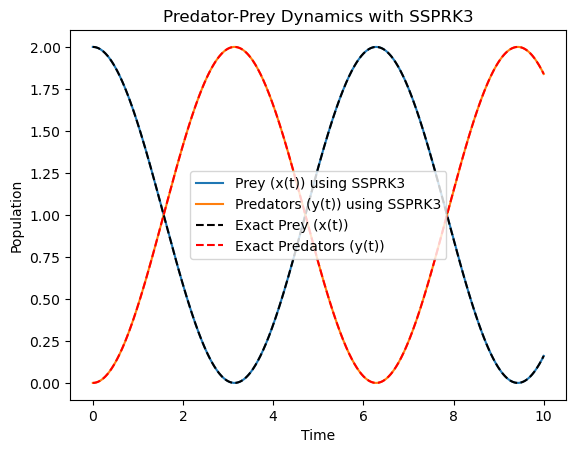

In [285]:
''' Create the solver object and solve the ODE and plot it'''
# Integrate the system using SSPRK3 method
c1t1_values, population_values1 = solver(rhs_prey_predator_c1, initial_condition, t0, dt, T, "SSPRK3")

# Extracting prey and predator populations of each method
prey_pop_SSPRK3 = [pop[0] for pop in population_values1]
predator_pop_SSPRK3 = [pop[1] for pop in population_values1]


# Plot the populations over time
plt.plot(c1t1_values, prey_pop_SSPRK3, label='Prey (x(t)) using SSPRK3')
plt.plot(c1t1_values, predator_pop_SSPRK3, label='Predators (y(t)) using SSPRK3')

# Plot the exact solutions
plt.plot(t_exact, x_exact, 'k--', label='Exact Prey (x(t))')
plt.plot(t_exact, y_exact, 'r--', label='Exact Predators (y(t))')

# Add labels and title to plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics with SSPRK3')
plt.show()

### Test Case 2 : 
Using the following parameters $ \alpha = 2/3 , \beta = 4/3,  \gamma = \delta = 1 $ and the following function $ f(t) =0 $ and $ g(t) =0 $ with the initial conditions of $ x = 0.9 , y = 0.9 $ . 

In [286]:
""" Define the function of the rhs of the ODE for test case 2 """
def rhs_prey_predator_c2(t,y):
   x,y = y 
   # Define the function of rhs f(x) and g(x)
   ft = 0
   gt = 0
   
   alpha = 2/3
   beta = 4/3
   gamma = delta = 1 
   dxdt = alpha * x - beta * x * y + ft
   dydt = gamma * x * y - delta * y + gt
   return np.array([dxdt,dydt])

In [287]:
''' Defining the main function time parameters and initial conditions of test case 2'''
t0 = 0 
T = 30
dt = 2.5e-4
initial_condition = np.array([0.9,0.9])

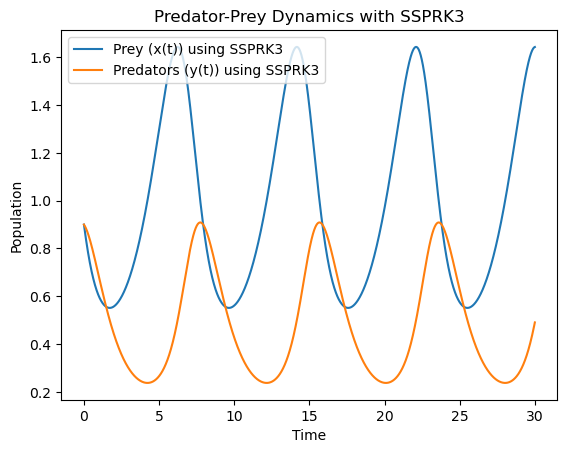

In [288]:
''' Create the solver object and solve the ODE and plot it'''
# Integrate the system using SSPRK3 method
c2t1_values, population_values_3 = solver(rhs_prey_predator_c2, initial_condition, t0, dt, T, "SSPRK3")

# Extracting prey and predator populations of each method
prey_pop_SSPRK3_2 = [pop[0] for pop in population_values_3]
predator_pop_SSPRK3_2 = [pop[1] for pop in population_values_3]

# Plot the populations over time
plt.plot(c2t1_values, prey_pop_SSPRK3_2, label='Prey (x(t)) using SSPRK3')
plt.plot(c2t1_values, predator_pop_SSPRK3_2, label='Predators (y(t)) using SSPRK3')

# Add labels and title to plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics with SSPRK3')
plt.show()

## Implementation
### Adjustments on Initial Testing:
The initial testing phase has established the relationship between the prey and the predator as an oscillatory behavior of increase and decrease of population. Moreover, it also illustrated that the population fluctuates based on a population of a certain species. The graph above shows that there is an inphase relationship between the prey and predators so the formula does works. The only adjustment to do is to create a function which performs all of the process of assigning, calculating, and plotting of the graph to save time and effort. For the adjustments of the implementation I will add a oscillatory function as an external factor so that the results are not too perfect to be true. 
$$ f(t) = 0.1 \sin(2 \pi t) + 0.05 \sin(4 \pi t)$$
$$ g(t) = 0.05  \cos(2  \pi t) + 0.025 \cos(4 \pi t) $$

These formulas or external factors are chosen to add an environmental factors to the simulation so that its resembles the actual life cycle of species with the external factors such as food, habitats, and reproduction. This introduces some unexpected fluctuations to the model which makes it much more complex. Besides that, keeping the conditions of the second test case makes it much more complex to compute.Hence its my role to prove which three of the numerical methods taught in the module is the most suitable for complex dynamic system.

In [289]:
'''Define a function which performs the calculation, plotting, and saving of the data for a given method'''
# Define the prey function
def f(t):
    return 0.1 * np.sin(2 * np.pi * t) + 0.05 * np.sin(4 * np.pi * t)

# Define the predator function
def g(t):
    return 0.05 * np.cos(2 * np.pi * t) + 0.025 * np.cos(4 * np.pi * t)

# Define the rhs of the ODE
def rhs_preyPredator(t, y):
    # Unpack the prey and predator initial populations
    x, y = y
    # Define the parameters of the simulation
    alpha, beta , gamma, delta = 2/3, 4/3, 1, 1
    # Get the rhs of the ODE
    dxdt = alpha * x - beta * x * y + f(t)
    dydt = delta * x * y - gamma * y + g(t)
    # Return the rhs of the ODE
    return np.array([dxdt, dydt])

# Define the rhs of the ODE in the perfect case 
def perfect_preyPredator(t, y):
    x,y = y
    # Define the parameters of the simulation
    alpha, beta , gamma, delta = 2/3, 4/3, 1, 1
    # Get the rhs of the ODE
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    # Return the rhs of the ODE
    return np.array([dxdt, dydt])


# A Function that performs the calculations, plotting and storing te data for a given method
def compare_and_plot(y0,t0,T,dts,method):
    num_dts = len(dts)
    fig, axs = plt.subplots(num_dts, figsize=(10, num_dts * 5), sharex=True)
    # If there is only one dt, axs won't be an array, so we make it one for consistency
    if num_dts == 1:
        axs = [axs]
    # Dataframes to store the differences for all dt values
    all_dfs = []
    # Iterate through the dt values
    for i, dt in enumerate(dts):
        # Solve the systems
        t_values_actual, pop_values_actual = solver(rhs_preyPredator, y0, t0, dt, T, method)
        t_values_perfect, pop_values_perfect = solver(perfect_preyPredator, y0, t0, dt, T, method)
        # Calculate differences
        prey_diff = np.array([pop[0] for pop in pop_values_actual]) - np.array([pop[0] for pop in pop_values_perfect])
        predator_diff = np.array([pop[1] for pop in pop_values_actual]) - np.array([pop[1] for pop in pop_values_perfect])
        # Create a pandas DataFrame with the differences
        df = pd.DataFrame({'Time': t_values_actual, 'Prey Difference': prey_diff, 'Predator Difference': predator_diff})
        all_dfs.append(df)
        # Plot the actual system
        axs[i].plot(t_values_actual, [pop[0] for pop in pop_values_actual], label=f'Prey with dt={dt}')
        axs[i].plot(t_values_actual, [pop[1] for pop in pop_values_actual], label=f'Predators with dt={dt}')
        # Plot the perfect system
        axs[i].plot(t_values_perfect, [pop[0] for pop in pop_values_perfect], '--', label=f'Perfect Prey with dt={dt}')
        axs[i].plot(t_values_perfect, [pop[1] for pop in pop_values_perfect], '--', label=f'Perfect Predators with dt={dt}')
        # Show the legend, set the labels and title
        axs[i].legend()
        axs[i].set_ylabel('Population')
        axs[i].set_title(f'Dynamics for dt={dt}')
    # Set the x label to be the same for all plots  
    plt.xlabel('Time')
    plt.suptitle(f'Comparison of Predator-Prey Dynamics for Different dt Values using {method}')
    plt.show()
    
    return all_dfs

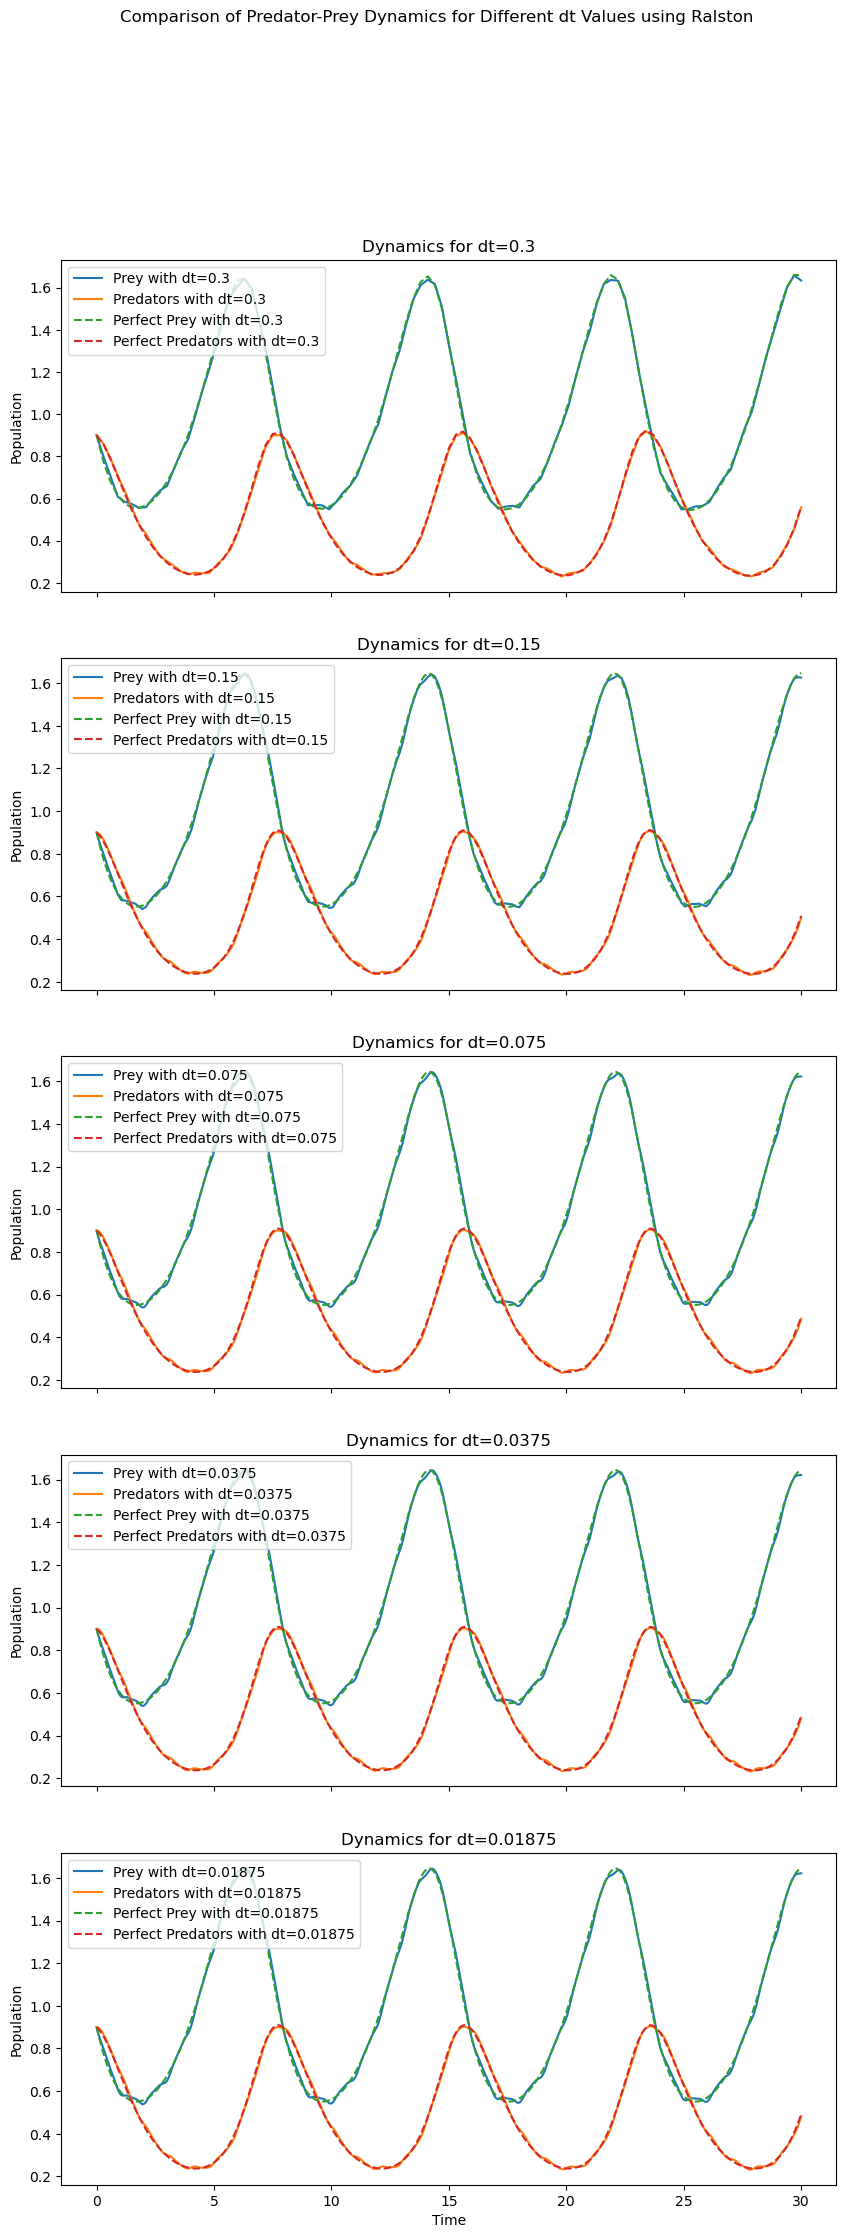

In [290]:
# Implementation of SSPRK3 Numerical method
t0 = 0 
T = 30 
dt = [T/100.0, T/200.0, T/400.0, T/800.0, T/1600.0]
initial_condition = np.array([0.9,0.9])
# Compare systems and plot
difference_df = compare_and_plot(initial_condition, t0, T, dt, 'Ralston')

## Results

[*Simulate and show results for each of the test cases suggested by your boss for a range of time steps until a final time $T$.
For test case A, you should use $T = 2.5\pi$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
For test case B, you should use $T = 30$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
You should demonstrate how solutions look for each method, and the accuracy and efficiency of each approach. [50 words]*]



## Analysis

[*Comment on the efficiency and accuracy of each approach. [250 words]*]

## Conclusion

[*Compare the methods that you have results for, and any other relevant methods from the module, and make a recommendation of which method you think is best. [300 words]*]